### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

### Content:-
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


## Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

1-Build a machine learning model to identify fraudulent credit card transactions.

2-Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.

3-Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.

4-Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

# Exploratory data analysis

## Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('C:\\Users\\info\\Downloads\\creditcard.csv\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling missing values

#### Handling missing values in columns

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [8]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [9]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [10]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

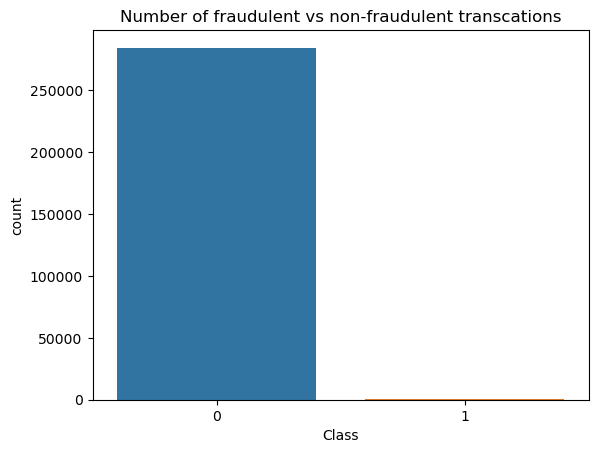

In [11]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

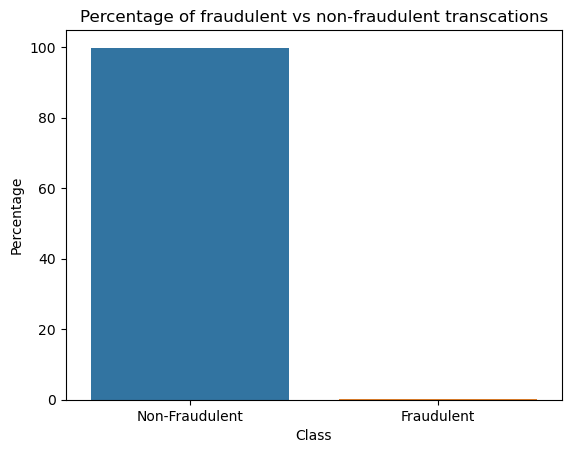

In [12]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [13]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

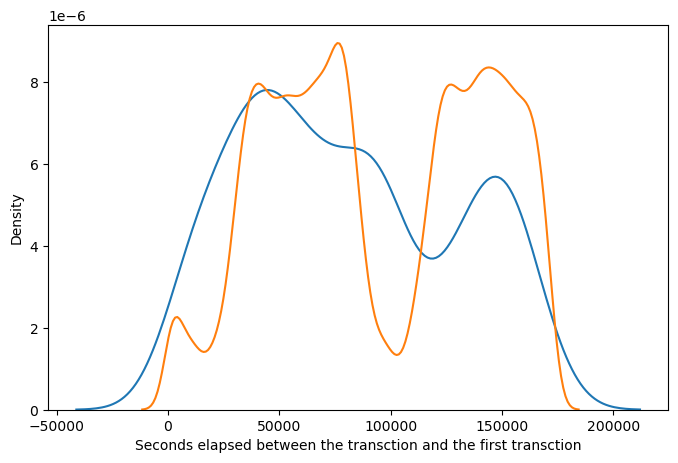

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [15]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

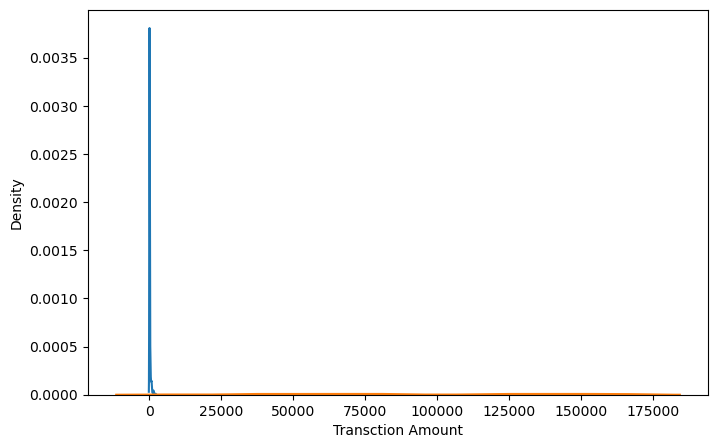

In [16]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

## Train-Test Split

In [17]:
# Import library
from sklearn.model_selection import train_test_split

In [18]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [19]:
# Putting target variable to y
y = df['Class']

In [20]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [21]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [22]:
# Instantiate the Scaler
scaler = StandardScaler()

In [23]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [24]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [25]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

In [26]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

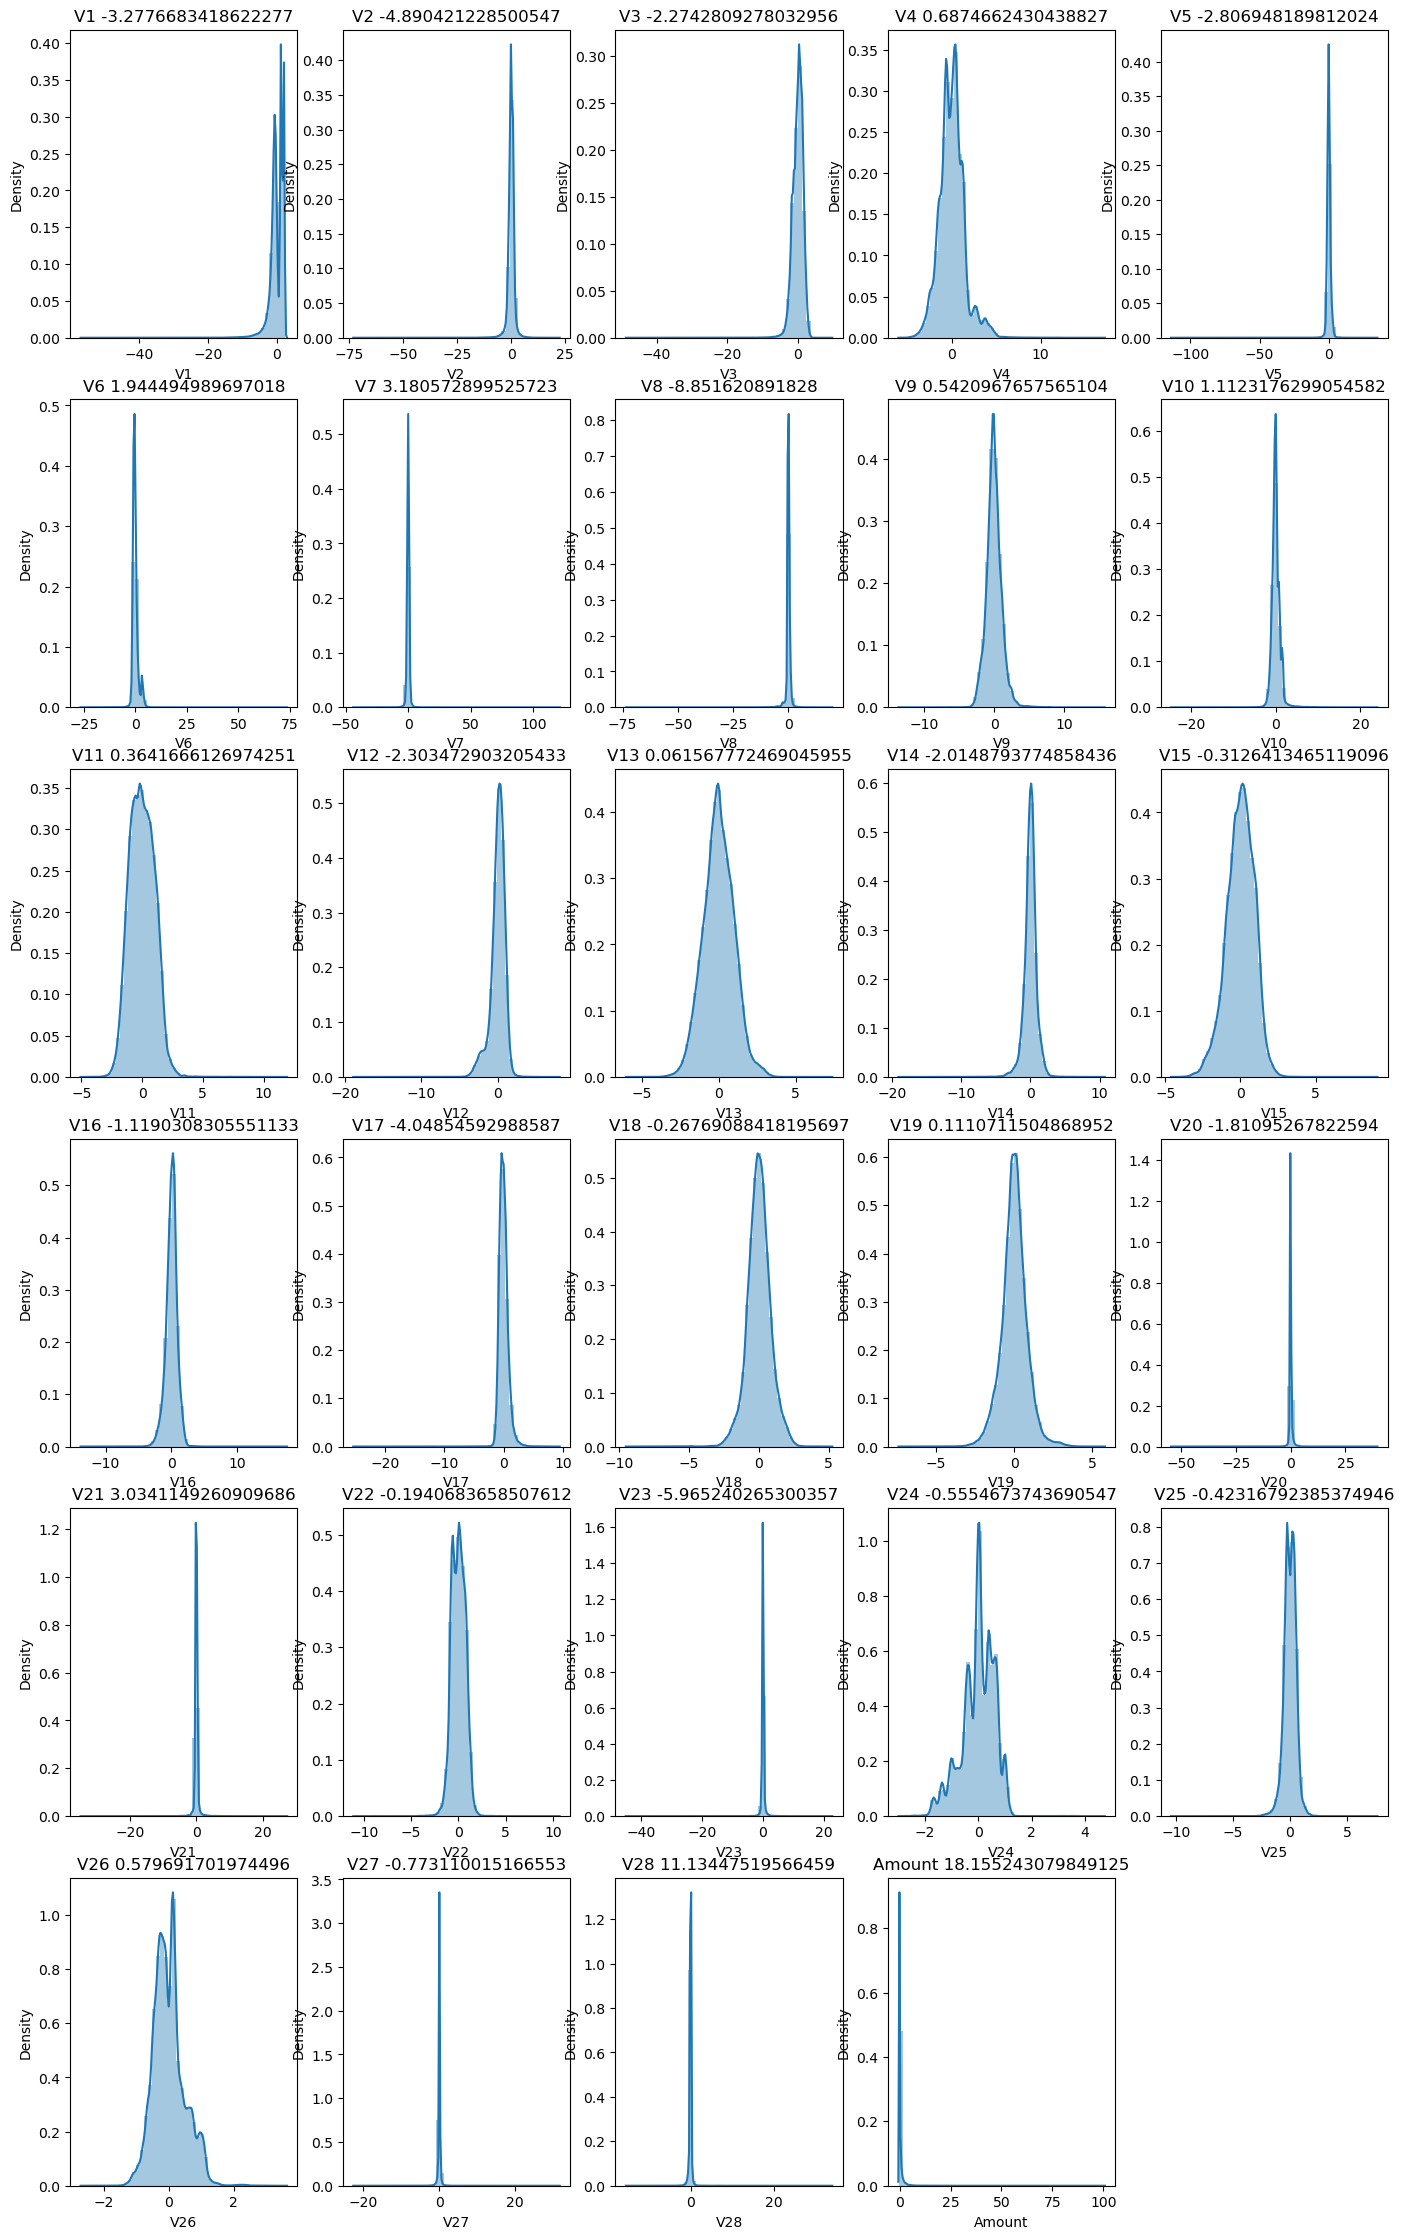

In [27]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [28]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [29]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

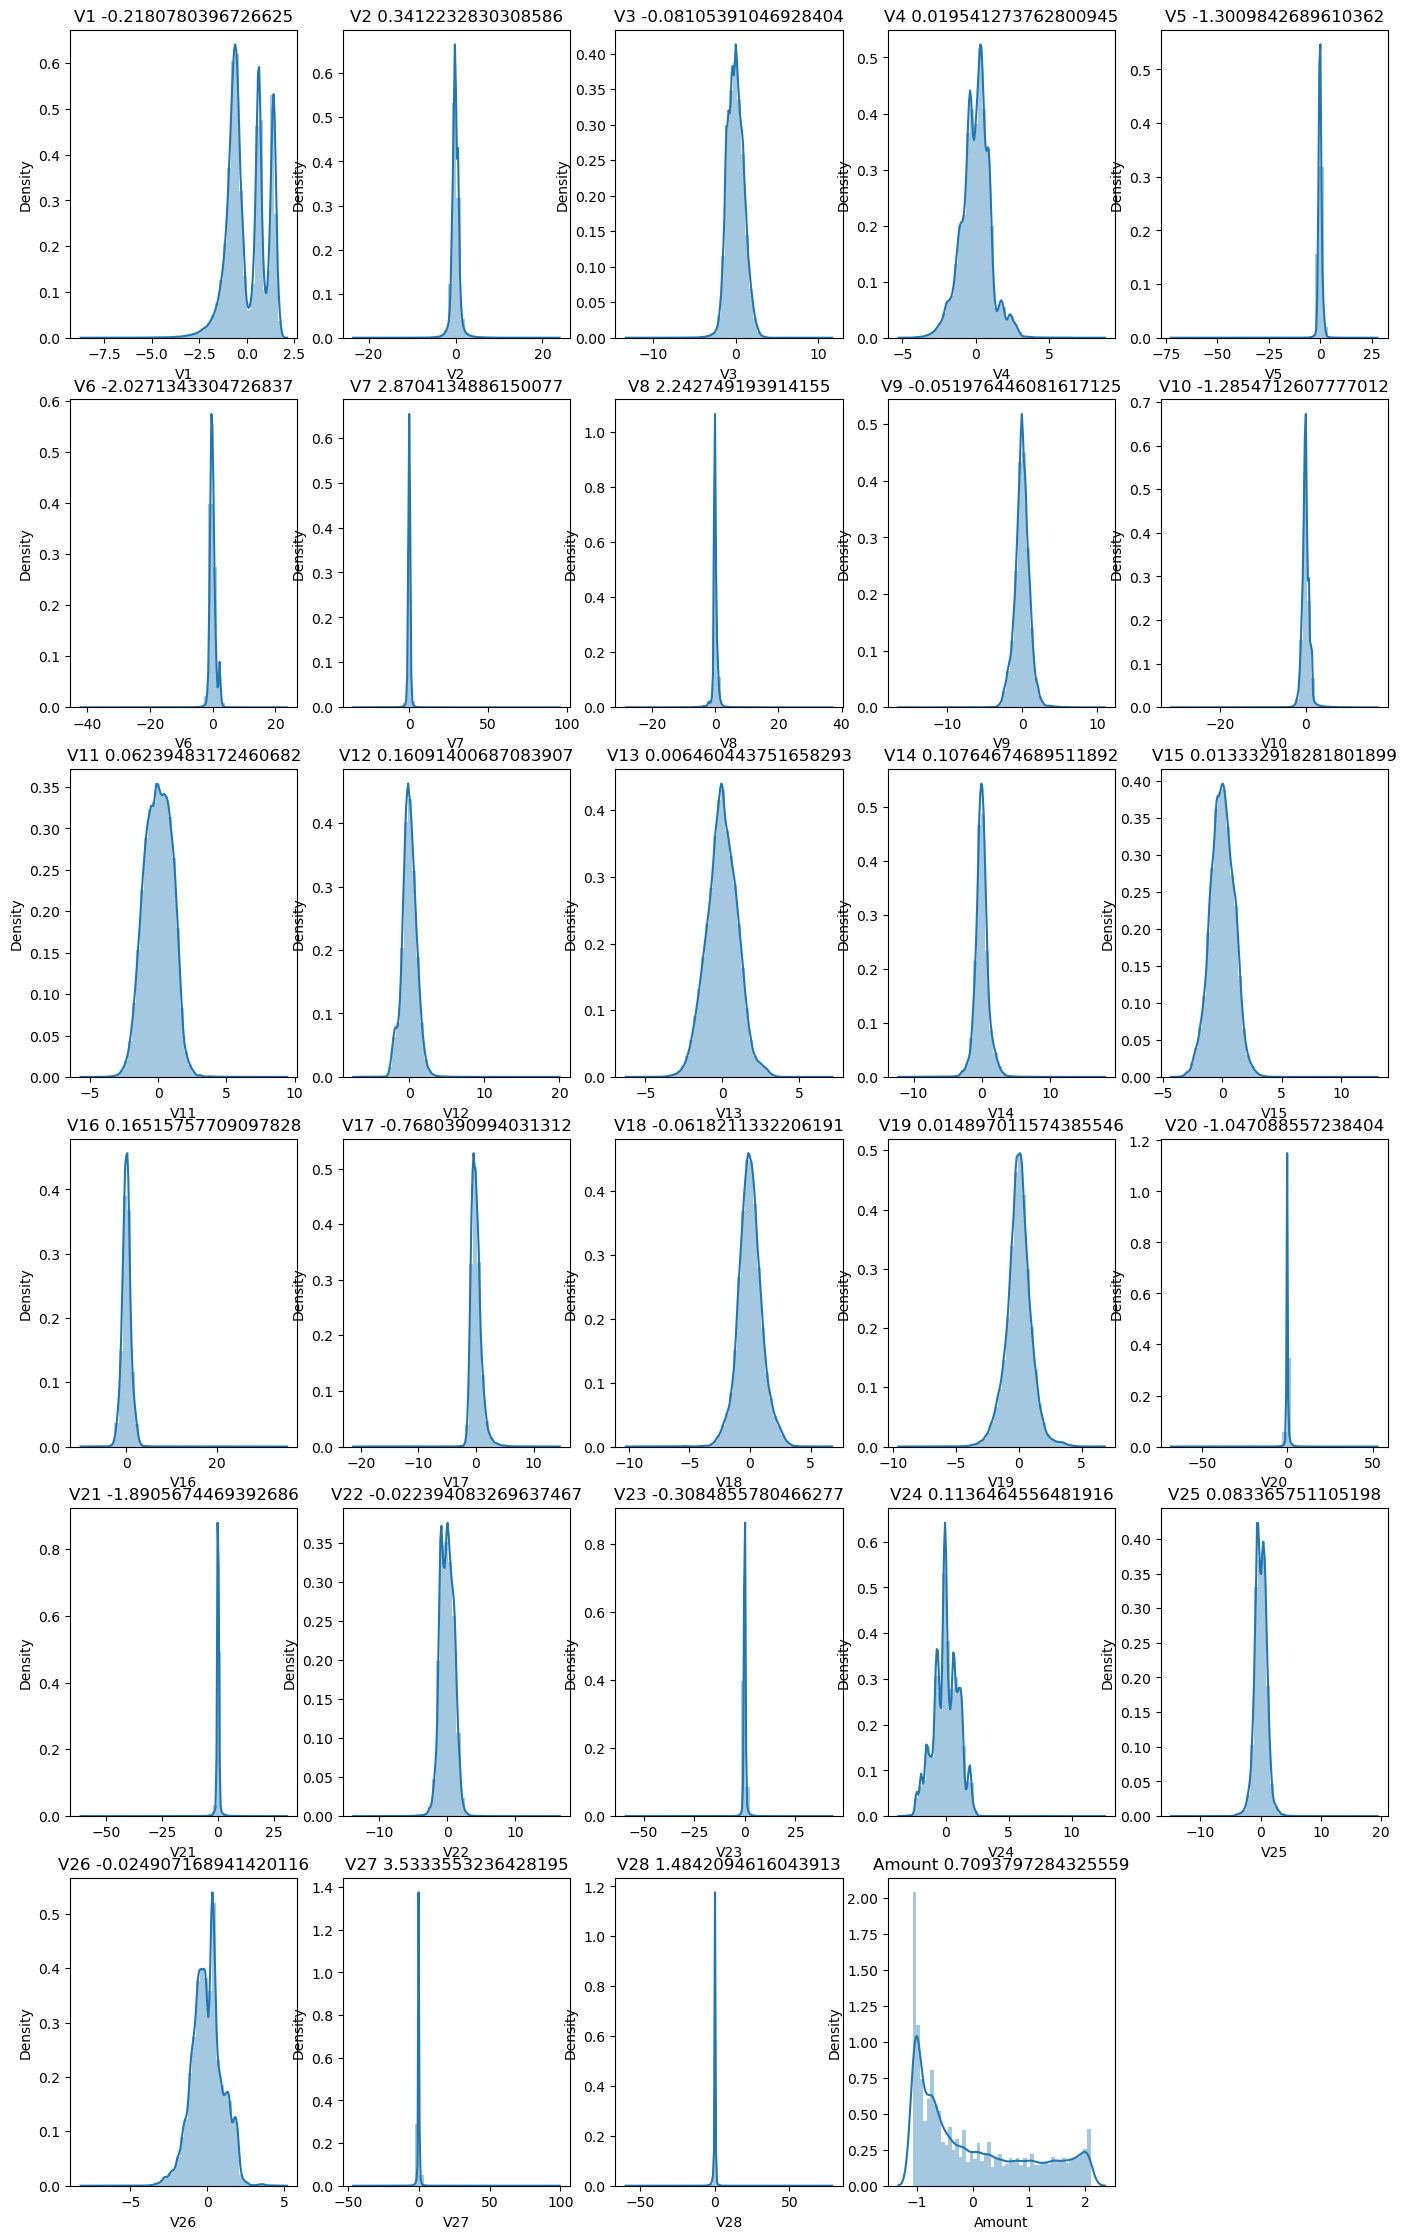

In [30]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Model building on imbalanced data

### Logistic regression

### By default

In [33]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Logistic Regression model
model_lr_default = LogisticRegression(random_state=100)

# Fit the model on the training data
model_lr_default.fit(X_train, y_train)

# Predictions on the test set
y_pred_lr_default = model_lr_default.predict(X_test)

# Evaluate the model's performance
print("Default Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_default))
print("\nDefault Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr_default))


Default Logistic Regression - Confusion Matrix:
 [[56849    17]
 [   39    57]]

Default Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



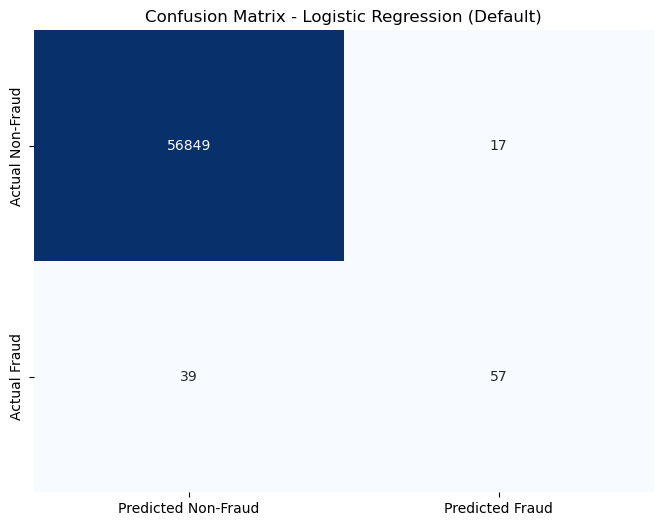

In [35]:
import seaborn as sns

# Default Logistic Regression - Confusion Matrix
conf_matrix_lr_default = confusion_matrix(y_test, y_pred_lr_default)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Logistic Regression (Default)')
plt.show()


## using GridSearch 

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Instantiate the Logistic Regression model
model_lr_grid = LogisticRegression(random_state=100)

# Create GridSearchCV object
grid_search_lr = GridSearchCV(model_lr_grid, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model with grid search on the training data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters from grid search
best_params_lr = grid_search_lr.best_params_
print("Best Parameters (Logistic Regression - Grid Search):", best_params_lr)

# Predictions on the test set using the best model from grid search
y_pred_lr_grid = grid_search_lr.best_estimator_.predict(X_test)

# Evaluate the grid search model's performance
print("\nGrid Search Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_grid))
print("\nGrid Search Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr_grid))


Best Parameters (Logistic Regression - Grid Search): {'C': 1}

Grid Search Logistic Regression - Confusion Matrix:
 [[56849    17]
 [   39    57]]

Grid Search Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



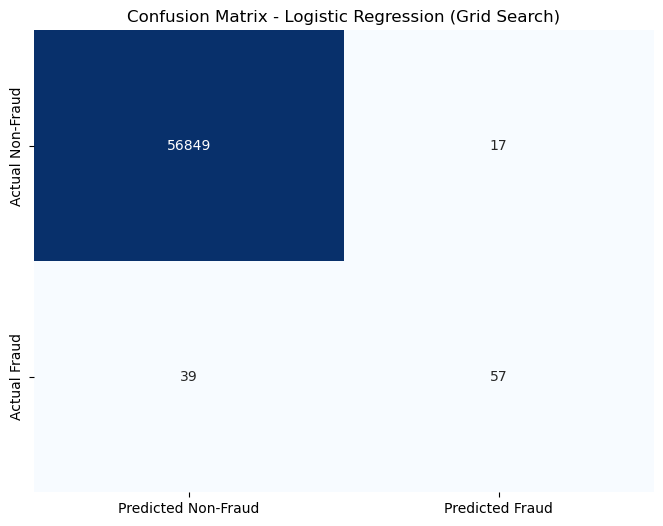

In [37]:
import seaborn as sns

# Grid Search Logistic Regression - Confusion Matrix
conf_matrix_lr_grid = confusion_matrix(y_test, y_pred_lr_grid)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_grid, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Logistic Regression (Grid Search)')
plt.show()


Roc curve

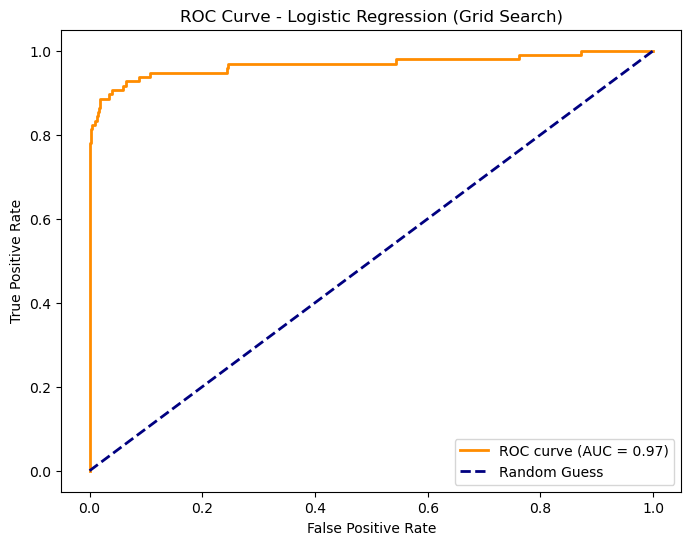

In [38]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class from the best model
y_prob_lr_grid = grid_search_lr.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_grid)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Grid Search)')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression - Oversampling:

In [39]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=100)

# Fit and transform on training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Verify the class distribution after oversampling
print("Class distribution after oversampling:\n", pd.Series(y_train_oversampled).value_counts())

# Instantiate the Logistic Regression model
model_lr_oversampled = LogisticRegression(random_state=100)

# Fit the model on the oversampled training data
model_lr_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predictions on the test set
y_pred_lr_oversampled = model_lr_oversampled.predict(X_test)

# Evaluate the oversampled model's performance
print("\nLogistic Regression with Oversampling - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_oversampled))
print("\nLogistic Regression with Oversampling - Classification Report:\n", classification_report(y_test, y_pred_lr_oversampled))


Class distribution after oversampling:
 0    227449
1    227449
Name: Class, dtype: int64

Logistic Regression with Oversampling - Confusion Matrix:
 [[55534  1332]
 [   11    85]]

Logistic Regression with Oversampling - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



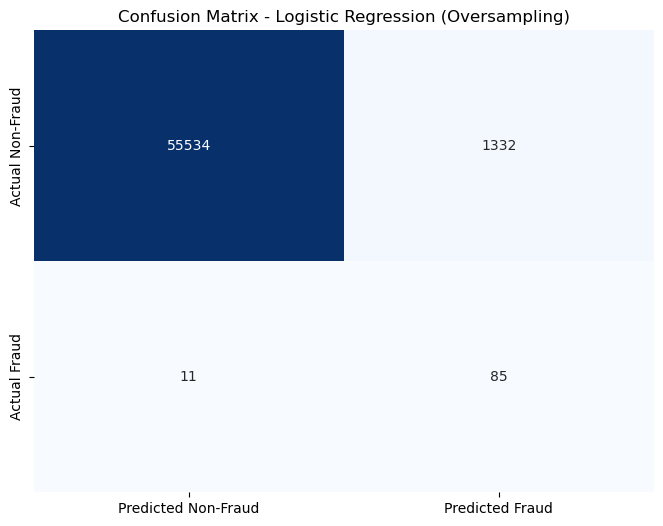

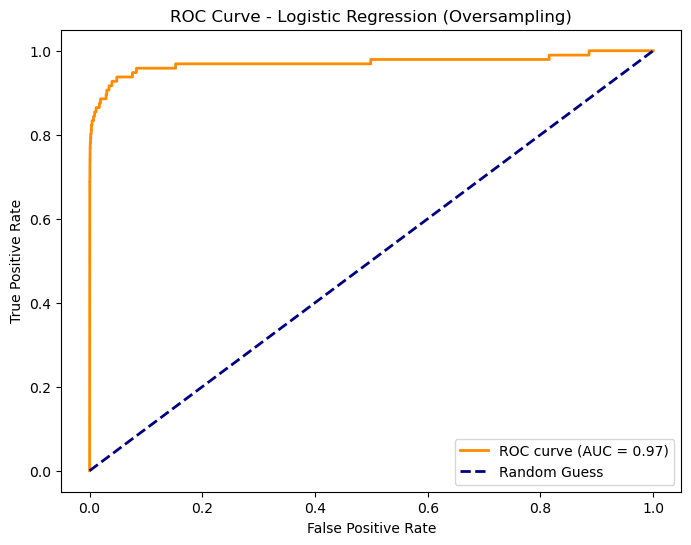

In [40]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Logistic Regression with Oversampling - Confusion Matrix
conf_matrix_lr_oversampled = confusion_matrix(y_test, y_pred_lr_oversampled)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_oversampled, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Logistic Regression (Oversampling)')
plt.show()

# Logistic Regression with Oversampling - ROC Curve
y_prob_lr_oversampled = model_lr_oversampled.predict_proba(X_test)[:, 1]
fpr_lr_oversampled, tpr_lr_oversampled, thresholds_lr_oversampled = roc_curve(y_test, y_prob_lr_oversampled)
roc_auc_lr_oversampled = auc(fpr_lr_oversampled, tpr_lr_oversampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_oversampled, tpr_lr_oversampled, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lr_oversampled))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Oversampling)')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression - Undersampling:

In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=100)

# Fit and transform on training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:\n", pd.Series(y_train_undersampled).value_counts())

# Instantiate the Logistic Regression model
model_lr_undersampled = LogisticRegression(random_state=100)

# Fit the model on the undersampled training data
model_lr_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predictions on the test set
y_pred_lr_undersampled = model_lr_undersampled.predict(X_test)

# Evaluate the undersampled model's performance
print("\nLogistic Regression with Undersampling - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_undersampled))
print("\nLogistic Regression with Undersampling - Classification Report:\n", classification_report(y_test, y_pred_lr_undersampled))


Class distribution after undersampling:
 0    396
1    396
Name: Class, dtype: int64

Logistic Regression with Undersampling - Confusion Matrix:
 [[55016  1850]
 [   10    86]]

Logistic Regression with Undersampling - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.90      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



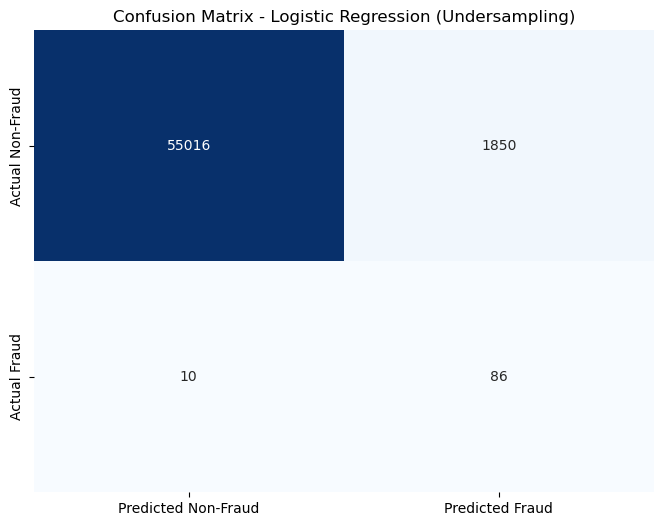

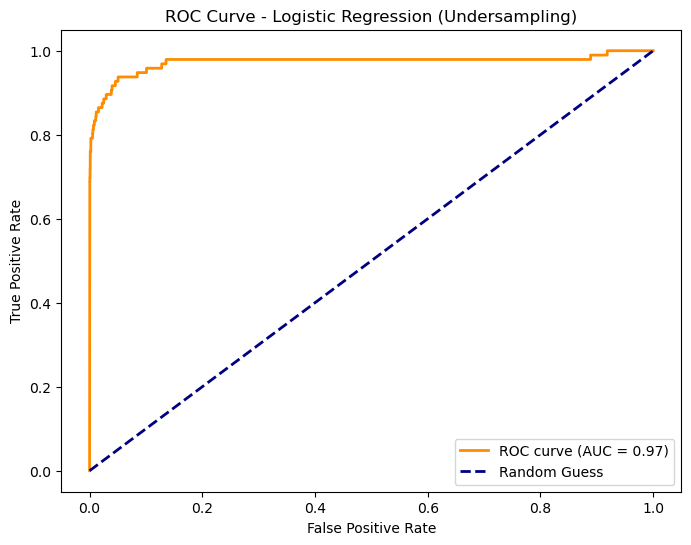

In [42]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Logistic Regression with Undersampling - Confusion Matrix
conf_matrix_lr_undersampled = confusion_matrix(y_test, y_pred_lr_undersampled)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_undersampled, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Logistic Regression (Undersampling)')
plt.show()

# Logistic Regression with Undersampling - ROC Curve
y_prob_lr_undersampled = model_lr_undersampled.predict_proba(X_test)[:, 1]
fpr_lr_undersampled, tpr_lr_undersampled, thresholds_lr_undersampled = roc_curve(y_test, y_prob_lr_undersampled)
roc_auc_lr_undersampled = auc(fpr_lr_undersampled, tpr_lr_undersampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_undersampled, tpr_lr_undersampled, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lr_undersampled))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Undersampling)')
plt.legend(loc='lower right')
plt.show()


## Random forest

## By default 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the Random Forest model
model_rf_default = RandomForestClassifier(random_state=100)

# Fit the model on the training data
model_rf_default.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf_default = model_rf_default.predict(X_test)

# Evaluate the model's performance
print("Default Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_default))
print("\nDefault Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf_default))


Default Random Forest - Confusion Matrix:
 [[56858     8]
 [   28    68]]

Default Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



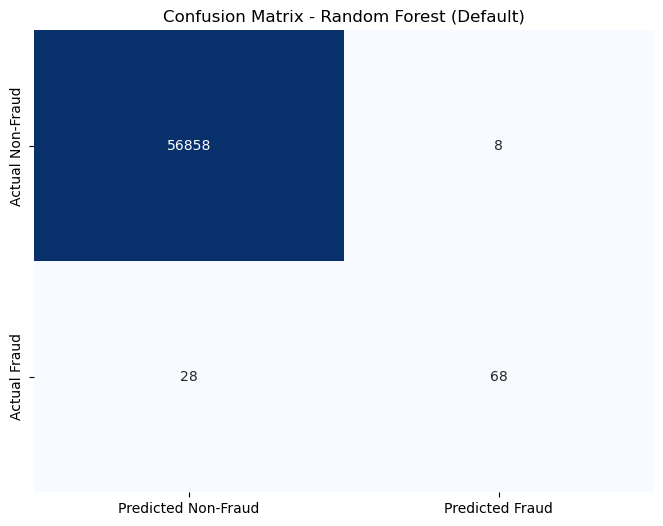

In [33]:
import seaborn as sns

# Random Forest - Confusion Matrix
conf_matrix_rf_default = confusion_matrix(y_test, y_pred_rf_default)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Random Forest (Default)')
plt.show()


We acheived very good ROC 0.99 on the train set.

#### Oversampling 

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler_rf = RandomOverSampler(random_state=100)

# Fit and transform on training data
X_train_oversampled_rf, y_train_oversampled_rf = oversampler_rf.fit_resample(X_train, y_train)

# Verify the class distribution after oversampling
print("Class distribution after oversampling:\n", pd.Series(y_train_oversampled_rf).value_counts())

# Instantiate the Random Forest model
model_rf_oversampled = RandomForestClassifier(random_state=100)

# Fit the model on the oversampled training data
model_rf_oversampled.fit(X_train_oversampled_rf, y_train_oversampled_rf)

# Predictions on the test set
y_pred_rf_oversampled = model_rf_oversampled.predict(X_test)

# Evaluate the oversampled model's performance
print("\nRandom Forest with Oversampling - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_oversampled))
print("\nRandom Forest with Oversampling - Classification Report:\n", classification_report(y_test, y_pred_rf_oversampled))


Class distribution after oversampling:
 0    227449
1    227449
Name: Class, dtype: int64

Random Forest with Oversampling - Confusion Matrix:
 [[56854    12]
 [   25    71]]

Random Forest with Oversampling - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



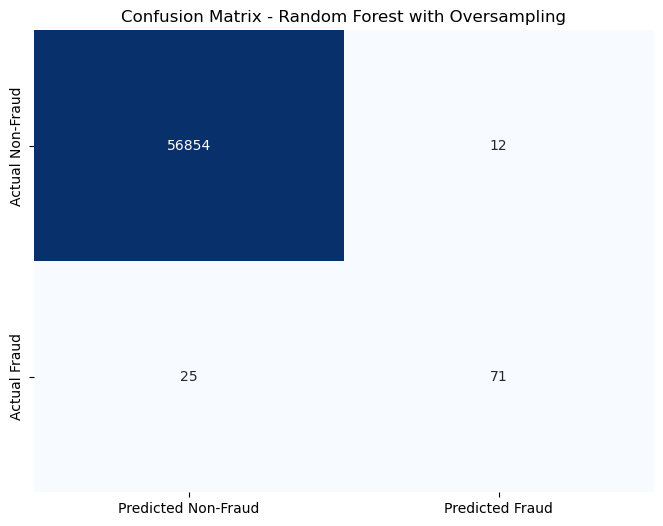

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest with Oversampling - Confusion Matrix
conf_matrix_rf_oversampled = confusion_matrix(y_test, y_pred_rf_oversampled)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_oversampled, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Random Forest with Oversampling')
plt.show()


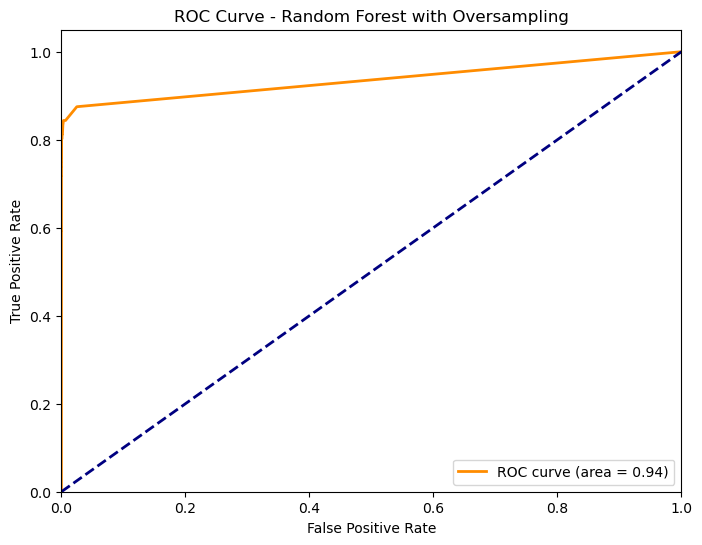

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob_rf_oversampled = model_rf_oversampled.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf_oversampled)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest with Oversampling')
plt.legend(loc="lower right")
plt.show()


## Undersampling 

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler
undersampler_rf = RandomUnderSampler(random_state=100)

# Fit and transform on training data
X_train_undersampled_rf, y_train_undersampled_rf = undersampler_rf.fit_resample(X_train, y_train)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:\n", pd.Series(y_train_undersampled_rf).value_counts())

# Instantiate the Random Forest model
model_rf_undersampled = RandomForestClassifier(random_state=100)

# Fit the model on the undersampled training data
model_rf_undersampled.fit(X_train_undersampled_rf, y_train_undersampled_rf)

# Predictions on the test set
y_pred_rf_undersampled = model_rf_undersampled.predict(X_test)

# Evaluate the undersampled model's performance
print("\nRandom Forest with Undersampling - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_undersampled))
print("\nRandom Forest with Undersampling - Classification Report:\n", classification_report(y_test, y_pred_rf_undersampled))


Class distribution after undersampling:
 0    396
1    396
Name: Class, dtype: int64

Random Forest with Undersampling - Confusion Matrix:
 [[55936   930]
 [   15    81]]

Random Forest with Undersampling - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.84      0.15        96

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962



##### confusion matrix

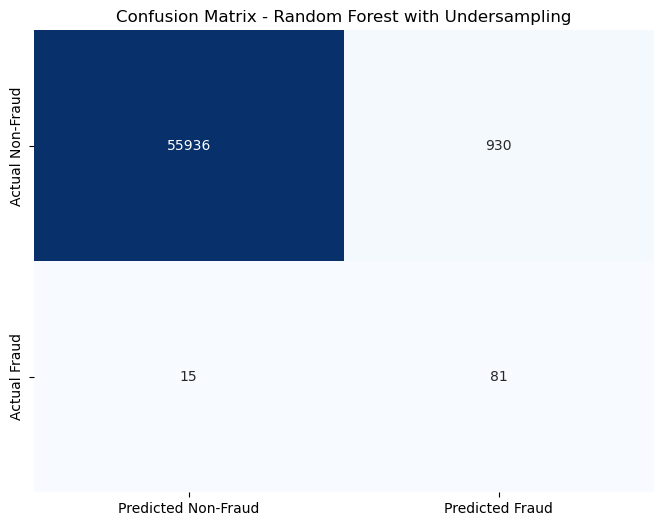

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest with Undersampling - Confusion Matrix
conf_matrix_rf_undersampled = confusion_matrix(y_test, y_pred_rf_undersampled)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_undersampled, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Confusion Matrix - Random Forest with Undersampling')
plt.show()


##### ROC CURVE

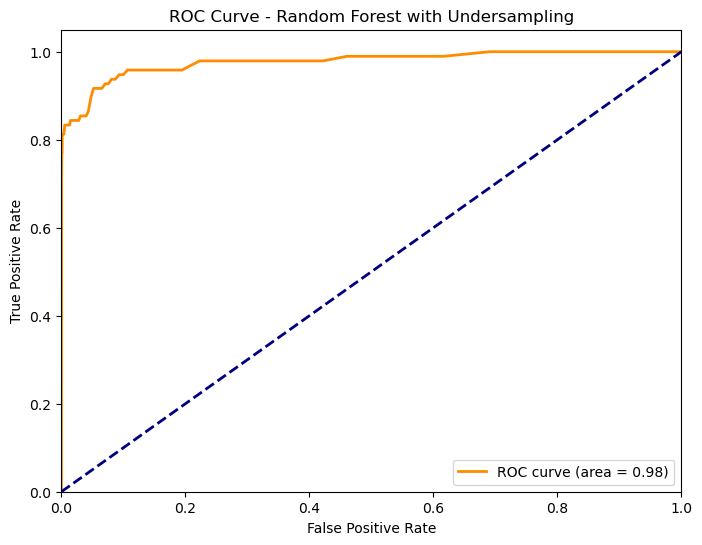

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob_rf_undersampled = model_rf_undersampled.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf_undersampled)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest with Undersampling')
plt.legend(loc="lower right")
plt.show()


We can see that we have very good ROC on the test set 0.98, which is almost close to 1.